## Final Project Submission

Please fill out:
* Project owner: Group 1 DSF_PT08P2
* Group leader: Gilbert Kipkirui Cheruiyot
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samuel Karu & Daniel Ekale

In [229]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import statsmodels.api as sm
import zipfile
import warnings
import os
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
import warnings
from statsmodels.stats.diagnostic import linear_rainbow
sns.set_style()


### 1. Project Overview

This project will use exploratory data analysis to generate insights for the business stakeholder.

### 2.0 Business Understanding


#### 2.1 Business Problem
Our company recognizes the growing trend among major industry players in producing original video content and intends to establish a new movie studio to capitalize on this opportunity. However, we currently lack the necessary expertise and insights into filmmaking. To effectively guide the studio's development, we have been assigned the task of investigating the types of films that are currently excelling at the box office. The challenge lies in not only identifying these successful film trends but also converting this information into practical recommendations that the studio's leadership can use to make informed decisions about future film productions. Failure to do so may result in misguided investments and an inability to compete in the market.

To guide our research and analysis, we have formulated some questions that will be key in giving us insights and recomendations on the problem at hand. These questions are:

#### 2.2 Business Objectives
* What are the trends in movie release dates and what impact do they have on revenue?

* Is there a relationship between production budget and profitability and return on investment (ROI) of a movie? i.e Does a higher production budget automatically result to a higher profitability and vice versa.

* Determine which film genres are currently performing best at the box office.

* Establish trends in audience preferences and box office performance over recent years.

* Evaluate production costs associated with different genres.

* Understand the relationship between production cost and revenue streams of movies

* Evaluate if movie runtime has a relationship with the movie rating.

* Provide actionable insights for the new movie studio.

#### 2.3 Steps to achieve objectives:
* Research Box Office Data: Use sources like Box Office Mojo, IMDb, and industry reports to gather data on box office revenues by genre2.

* Analyse Historical Performance: Look at the historical performance of different genres to identify trends and patterns.

* Analyse Audience Preferences: Conduct analysis on movie data to understand audience preferences.

* Evaluate Production Costs: Research the typical production costs for different genres to understand budget implications.

* Compile Findings: Summarise your findings in a report that highlights the top-performing genres, trends, audience, and production costs.

* Provide Recommendations: Based on your findings, provide recommendations on which genres the new movie studio should consider producing.

### 3.0 Data Understanding

For this study, the datasets namely Movie Gross, Movie Budget, IMDB and Movie Info have been used to arrive at actionable insights for the movie studio project of the company.

The datasets for our analysis have been provided from the below sites:

* https://www.boxofficemojo.com/: Provides box office data including historical performance, daily, weekend and yearly box office grosses, film comparisons, release schedules as well as production budgets
* https://www.imdb.com/: Provides data on movie ratings, reviews, cast, box office gross
* https://www.rottentomatoes.com/: Provides data on audience scores and audience reception
* https://www.the-numbers.com/: Provides financial data on films including budgets, revenues and ratings
* https://www.themoviedb.org/: Provides a wide range of information related to movies, TV shows, and celebrities.

#### 3.1 Data Preparation and Cleaning
To analyze the data and generate insights, the following steps will be taken:

* Load the relevant libraries to use for the data analysis and visualization
* Load the Movie datasets which is in csv, tsv and db form to Jupyter Notebook
* Understand the data
* Identify and fix the missing values
* Ensure the columns have the correct data type
* Create new features that will be important for our analysis
* Merge important Data Frames

#### Movie_Data ERG

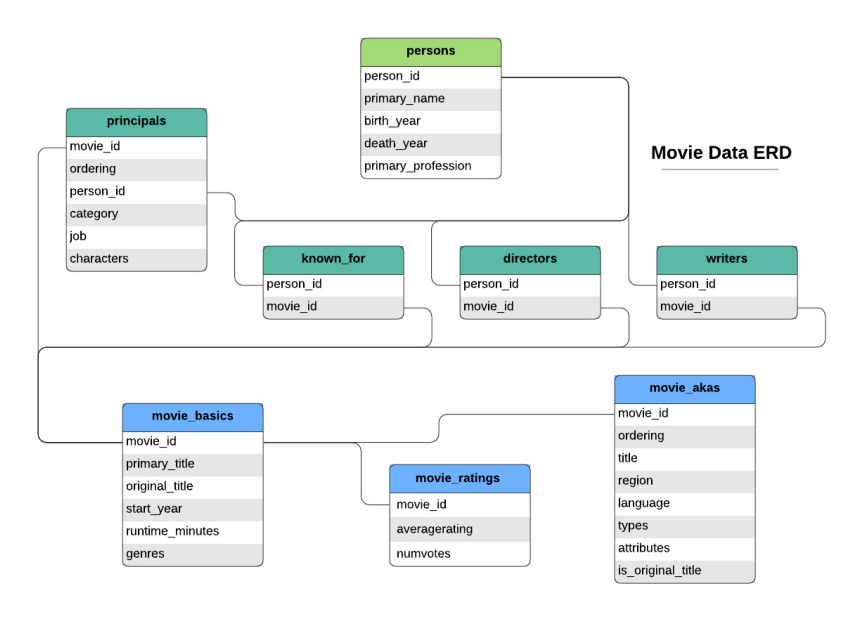

In [230]:
# Read the movie_data_erd jpeg
img = mpimg.imread('movie_data_erd.jpeg')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

### Reading Data

In [231]:
#Unzip the zipped database file!

#Path to your zip file
zip_path = './Data/dsc-phase-2-project-v3-main.zip'

#Extract to a specific directory (optional)
extract_path = './unzipped'

#Create the directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

#Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# print extract path
print("Unzipping complete. Database file extracted to:", extract_path)

Unzipping complete. Database file extracted to: ./unzipped


In [232]:
#Unzip imdb zipped database file!

#Path to your zip file
zip_path = 'unzipped/dsc-phase-2-project-v3-main/zippedData/im.db.zip'
#Extract to a specific directory (optional)
extract_path = './imdb'

#Create the directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

#Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    
# Print extract path
print("Unzipping complete. Database file extracted to:", extract_path)

Unzipping complete. Database file extracted to: ./imdb


In [233]:
# Read movie_gross file and check the first five rows
movie_gross = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/bom.movie_gross.csv.gz")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [234]:
# Read movie_budget file and check the first five rows
movie_budget = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/tn.movie_budgets.csv.gz")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [235]:
# Read tmdb file and check the first five rows
movie_tmdb = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/tmdb.movies.csv.gz")
movie_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [236]:
# Read reviews file and check the first five rows
reviews = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/rt.reviews.tsv.gz", sep='\t', encoding='ISO-8859-1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [237]:
# Read movie_info file and check the first five rows
movie_info = pd.read_csv("unzipped/dsc-phase-2-project-v3-main/zippedData/rt.movie_info.tsv.gz", sep='\t', encoding='ISO-8859-1')
movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [238]:
#create a connection to the database
conn = sqlite3.connect("im.db")

#create a cursor
cur = conn.cursor()

#Check the table names for our database
pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### Data Cleaning

#### Data information of movie_info dataset

In [239]:
# Check the statistics of the movie_info file to know the spread and the distribution of the data
movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


##### Statistical information:
* ID column in Movie_info has 1560 unique values counted. 
* The mean of the unique data in movie_info was 1007.30.
* The standard deviation of the ID column in movie_info was 579.16. This shows how data deviates from the mean.
* The minimum value of ID is 1 with the maximum being 2000

In [240]:
# Get the dimensions of the DataFrame movie_info
movie_info.shape

(1560, 12)

##### Movie_info shape: 
* Movie_info has 1560 rows and 12 columns

In [241]:
# Get a summary of information about the movie_info data
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


##### Summary of the information in Movie_info:
* All the ID column details are 1560 with none missing and is of an integer type
* Movie_info has 11 columns with text type of data. The 11 columns also have missing values

##### Check Missing Values in Movie Info Dataset

In [242]:
# Get a summary of information about the missing values in movie_info data

# Get missing values count and percentage

missing_values = movie_info.isnull().sum()

missing_percentage = (movie_info.isnull().sum() / len(movie_info)) * 100

# Create a summary dataframe

missing_summary_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})

# Sort by percentage missing
missing_summary = missing_summary_df.sort_values('Percentage Missing', ascending=False);

missing_summary


,Missing Values,Percentage Missing
currency,1220,78.205128
box_office,1220,78.205128
studio,1066,68.333333
writer,449,28.782051
theater_date,359,23.012821
dvd_date,359,23.012821
director,199,12.756410
synopsis,62,3.974359
runtime,30,1.923077
genre,8,0.512821


##### Information about the missing values:
* Studio, box_office and currency columns have the highest number of missing values, all above 50% of the values.

#### Cleaning the Movie_info dataset

In [243]:
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [244]:
# Drop columns with more than 50% missing values for the movie_info dataset

cols_to_drop = missing_summary[missing_summary['Percentage Missing'] > 50].index

# Drop these columns
df_cleaned = movie_info.drop(columns=cols_to_drop)

#Fill categorical columns with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Check if there are any remaining missing values
remaining_missing = df_cleaned.isnull().sum().sum()

# check if there are remaining columns with missing values
print("\
Remaining Missing Values:", remaining_missing)

df_cleaned.isna().sum()

Remaining Missing Values: 0


id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [245]:
#Check the first five rows of the cleaned dataset for the movie_info 
df_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,A group of air crash survivors are stranded in...,NR,Drama|Romance,Rodney Bennett,Giles Cooper,"Jan 1, 1987","Jun 1, 2004",200 minutes


#### Get more precise movie genres for granular analysis

In [246]:
# Split the genre column into a list of genres
df_cleaned['genre_list'] = df_cleaned['genre'].str.split('|')

# Explode to create a new row for each genre
df_cleaned_exploded = df_cleaned.explode('genre_list')

# Display the first few rows
df_cleaned_exploded.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


In [247]:
# Remove the genre_column
df_cleaned_exploded = df_cleaned_exploded.drop('genre', axis=1)

In [248]:
# Rename the genre_list column to genre
cleaned_movie_info = df_cleaned_exploded.rename(columns={'genre_list': 'genre'})

cleaned_movie_info.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


In [249]:
# Extract numeric values from the 'runtime' column
cleaned_movie_info['runtime'] = cleaned_movie_info['runtime'].str.extract('(\\d+)').astype(float)

cleaned_movie_info.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,Science Fiction and Fantasy


In [250]:
#Convert the dates to Date Time format
cleaned_movie_info['theater_date'] = pd.to_datetime(df_cleaned_exploded['theater_date'])

cleaned_movie_info['dvd_date'] = pd.to_datetime(df_cleaned_exploded['dvd_date'])

#### Checking the cleaned DataFrame Data Types

In [251]:
# Get a summary of information about the movie_info cleaned dataset
cleaned_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3581 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            3581 non-null   int64         
 1   synopsis      3581 non-null   object        
 2   rating        3581 non-null   object        
 3   director      3581 non-null   object        
 4   writer        3581 non-null   object        
 5   theater_date  3581 non-null   datetime64[ns]
 6   dvd_date      3581 non-null   datetime64[ns]
 7   runtime       3581 non-null   float64       
 8   genre         3581 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 279.8+ KB


##### Movie_info cleaned dataset information
* The dataset has 3581 rows and 9 columns.
* All the rows have no missing values.
* ID column has integers while runtime is made of datetime data type. The rest of the columns have text type of data.

##### The movie_info Dataset is now clean and ready for exploratory data analysis (EDA)

#### Data information of movie_budget dataset

In [252]:
# Check the statistics of the movie_budget file to know the spread and the distribution of the data
movie_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


##### Statistical information:
* ID column in Movie_budget has 5782 unique values counted. 
* The mean of the unique data in movie_budget was 50.37.
* The standard deviation of the ID column in movie_budget was 28.82. This shows how data deviates from the mean.
* The minimum value of ID is 1 with the maximum being 100.

In [253]:
# Get the dimensions of the DataFrame movie_budget
movie_budget.shape

(5782, 6)

##### movie_budget shape:
* Movie_budget has 5782 rows and 6 columns

In [254]:
# Get a summary of information about the movie_budget data
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### Summary of the information in movie_budget:
* The data has 5782 rows with none with missing values.
* Movie_budget has 5 columns with text type of data while the ID column has integer data type.

In [255]:
#Convert the release date to DateTime Format
movie_budget["release_date"] = pd.to_datetime(movie_budget['release_date'])

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [256]:
#Checking the first 5 rows
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [257]:
#Remove the dollar sign from the numerical columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:

    movie_budget[col] = movie_budget[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Display the cleaned data types and head of the dataframe to confirm changes

print(movie_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].head())

#Check first five rows of movie_budget
movie_budget.head()

   production_budget  domestic_gross  worldwide_gross
0        425000000.0     760507625.0     2.776345e+09
1        410600000.0     241063875.0     1.045664e+09
2        350000000.0      42762350.0     1.497624e+08
3        330600000.0     459005868.0     1.403014e+09
4        317000000.0     620181382.0     1.316722e+09


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


##### The movie_budget dataset is now clean and ready for EDA

#### Data information of movie_gross dataset

In [258]:
# Check the statistics of the movie_gross file to know the spread and the distribution of the data
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


##### Statistical information:
* Domestic gross column has 3359 entries counted.
* The standard deviation of domestic gross for the movies was about 67 million dollars, showing a large spread.
* The 75th percentile of the domestic gross was 2.79 million dollars with the median at 1.2 million dollars. This shows that the 75% of the movies have a domestic gross less than 2.79 million dollars. 25% of the movies have a domestic gross of less than 1.2 million dollars.
* The minimum domestic gross value for the movies was 100 dollars while the maximum domestic gross value stood at 936.7 million dollars.

In [259]:
# Get the dimensions of the DataFrame movie_gross
movie_gross.shape

(3387, 5)

##### Movie_gross shape:
* Movie_gross has 3387 rows and 5 columns

In [260]:
# Get a summary of information about the movie_gross data
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### Summary of the information in movie_gross:
* The data has 3387 rows with title column having no missing values. Title is thus the unique identifier in the dataset.
* Movie_gross has 3 columns with text type of data while the domestic_gross and year columns have floats and integer data types, respectively.

#### Converting data type of Foreign gross column to float

In [261]:
# Remove commas from the 'foreign_gross' column and convert to numeric
movie_gross["foreign_gross"] = movie_gross["foreign_gross"].replace({',': ''}, regex=True)

# Convert to foreign_gross to numeric
movie_gross["foreign_gross"] = pd.to_numeric(movie_gross["foreign_gross"])

# confirm changes on data type
print(movie_gross.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


#### Checking Missing Values in the Movie Gross Dataset

In [262]:
# Check missing values
missing_values = movie_gross.isnull().sum()

missing_percentage = (movie_gross.isnull().sum() / len(movie_gross)) * 100

# Create a summary dataframe
missing_summary_gross = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})


missing_summary_gross

,Missing Values,Percentage Missing
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


#### Details of missing values in movie gross dataset:
* The dataset has missing values primarily in the foreign_gross column, with a smaller number in domestic_gross and studio

#### Cleaning the movie_gross dataset:
To clean the data, we will remove rows with missing values in the studio and domestic_gross columns due to their small number, and consider imputing or removing rows with missing foreign_gross values based on their impact on analysis.

In [263]:
# Remove rows with missing values in 'studio' and 'domestic_gross' columns
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross'])

# Making a copy of the DataFrame
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross']).copy()

# Fill Missing Values in 'foreign_gross' with the median
median_foreign_gross=cleaned_movie_gross['foreign_gross'].median()
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].fillna(median_foreign_gross)

#Checking if there are any Missing Values
cleaned_movie_gross.isna().sum()

#Checking the Data Types of the Movie Gross Dataset
cleaned_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


##### The movie_gross dataset is now clean and ready for EDA

In [264]:
# Checking for tables in the imdb database
pd.read_sql("""SELECT name 
            FROM sqlite_master 
            WHERE type='table'
            ;""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [265]:
#Extract the column names for the movie_basics table
cur.execute("SELECT * FROM movie_basics")

columns = [description[0] for description in cur.description]

# Print column names
print("Column names:", columns)

# Fetch all data if needed
data = cur.fetchall()

Column names: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']



Join the Movie_basics table and the Movie_ratings table using Movie id which is the primary key

In [266]:
query = ("""SELECT *
         FROM movie_basics AS MB
         JOIN movie_ratings AS MR
         ON MB.movie_id = MR.movie_id
         """)
#Convert to a Dataframe
movie_df = pd.read_sql(query, conn)

# Return the first 5 rows for quickly testing if the database has the right type of data in it.
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


Check Missing Values for the joined tables

In [267]:
#check for the shape of the merged data
movie_df.shape

(73856, 9)

* The movie_df has 73,856 rows and 9 columns

In [268]:
#check for statistics of numerical columns
movie_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


Summary statistics:
* Start year spans between 2010 and 2019.
* The maximum runtime was 51,420 minutes. The average runtime was 94.65 minutes, with a deviation of 208.57 minutes. 
* The average rating had a low of 1 and a maximum of 10. The median for the rating was 6.5.
* The mean of the numvotes was 3.523662e+03 with standard deviation of 3.029402e+04.

Conclusion
* There is need to check on the accuracy of the data given the wide difference between the maximum time and the average.

In [269]:

# Get missing values count and percentage
missing_count = movie_df.isnull().sum()

missing_pct = (movie_df.isnull().sum() / len(movie_df)) * 100

# Create a summary dataframe

missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage Missing': missing_pct})

# Sort by percentage missing
missing_summary_df2 = missing_data.sort_values('Percentage Missing', ascending=False);

missing_summary_df2

,Missing Values,Percentage Missing
runtime_minutes,7620,10.317374
genres,804,1.088605
movie_id,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
movie_id,0,0.000000
averagerating,0,0.000000
numvotes,0,0.000000


Only runtime column and genres have missing values which are small compared to the length of the dataset. The rows with the missing data fro runtime minutes and genres shall be removed so as to have a clean dataset

In [270]:
# Identify rows to remove
rows_to_remove = ["runtime_minutes", "genres"]

# Remove rows with NaN values in specified columns
movie_df.dropna(subset=rows_to_remove, inplace=True)

# Check for remaining NaN counts in the DataFrame
print(movie_df.isna().sum())

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64


In [271]:
# Check columns of the dataset
movie_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes'],
      dtype='object')

* Movie_id column is duplicated. Need to remove it

In [272]:
#Remove columns with duplicate names
movie_df = movie_df.loc[:, ~movie_df.columns.duplicated()]

#Check the first five rows to confirm consistency of the data
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [273]:
#check for the data types

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Runtime_minutes and averagerating columns have floats type of data, with numvotes being integer. The rest of the five columns have text data.

#### The four datasets derived from IMDB, Movie_gross, Movie_budget and Movie_info are now clean and ready for EDA

#### 3.2 Exploratory Data Analysis (EDA)

#### 3.2.1 EDA Techniques for Box Office Data:

1. Summary Statistics: 
* Calculate mean, median, and mode of movie revenues, budgets and movie information. 
* Determine the standard deviation and range to understand the spread of the data.

2. Distribution Analysis:
* Create displots to visualize the distribution of movie information, budgets and revenues for different genres.
* Use box plots to identify outliers and understand the spread of data.

3. Trend Analysis:
* Plot time series graphs to analyze movie data trends over the years.
* Identify seasonal patterns and trends in movie releases and revenues.

4. Genre Analysis:
* Use bar charts to visualise information about the movie genres.
* Analyze the frequency of each genre to see which are most common and which are rare.

5. Correlation Analysis:
* Calculate correlation coefficients to identify relationships between variables.
* Create visuals to to show relationships among variables.

7. Movies Performance by Release Date:
* Investigate the impact of release dates on movie performance.
* Create heatmaps to visualize movide performance across different months and years.

8. Production Cost and Revenue Analysis:
* Compare production costs across different genres and their movie returns.
* Use scatter plots to visualize the relationship between production costs and revenues of movies.

In [274]:
#Merging Movie_info Dataset with Movie_budget Dataset
merged_df = pd.merge(cleaned_movie_info, movie_budget, on='id', how='inner')

#check for any missing values in merged_df
merged_df.isna().sum()

id                   0
synopsis             0
rating               0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
genre                0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

* There are no missing values on cleaned merged dataframe

In [342]:
# to get the cleaned datasets
cleaned_movie_gross.to_csv("movie_gross_csv_cleaned", index = True)
cleaned_movie_info.to_csv("movie_info_cleaned", index = True)
merged_df.to_csv("merged_df_cleaned", index = False)

# show first five rows of the cleaned_movie_gross
cleaned_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


##### Checking for Normality

Check for normality using histplot

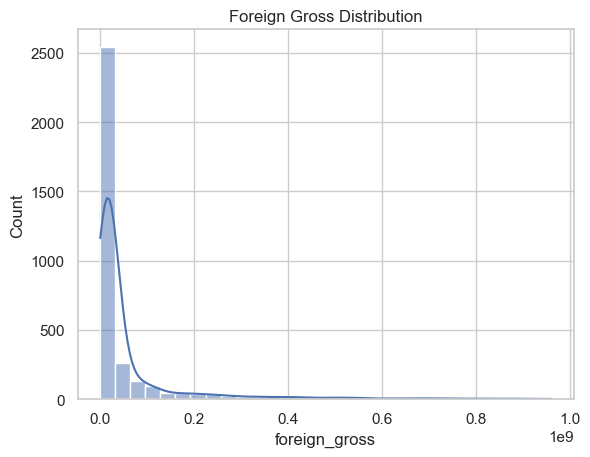

In [276]:
# Plotting distributions of foreign gross data
sns.histplot(cleaned_movie_gross, x="foreign_gross", kde=True,bins=30)

# Title
plt.title('Foreign Gross Distribution')

# Show histplot
plt.show()



* The data in the foreign gross column is not normally distributed. From the histplot, the data tends to skew towards the right, indicating presence of outliers.

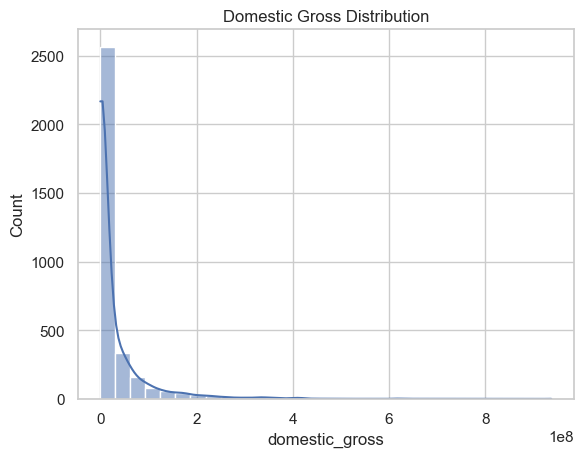

In [277]:
# Plotting distributions of domestic gross data
sns.histplot(cleaned_movie_gross, x="domestic_gross", kde=True, bins=30)

# Title
plt.title('Domestic Gross Distribution')

# Show histplot
plt.show()

* The data in the domestic gross column is not normally distributed. From the histplot, the data tends to skew towards the right, indicating presence of outliers.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


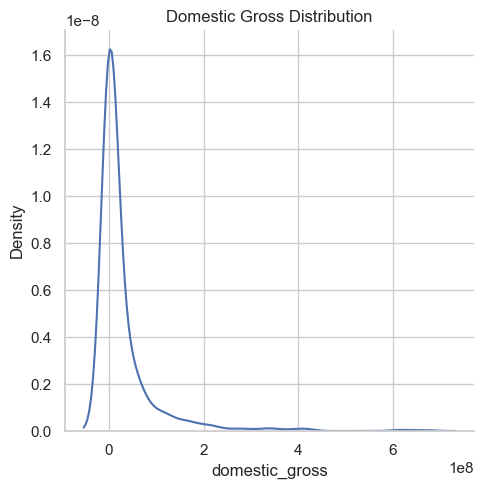

In [347]:
#Kernel Density Plot of domestic gross data
sns.displot(cleaned_movie_gross.sample(1000), x="domestic_gross", kind="kde")

# Title
plt.title('Domestic Gross Distribution')

# Show histplot
plt.show()

* The data in the domestic gross column is not normally distributed. From the displot, the data tends to skew towards the right, indicating presence of outliers.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


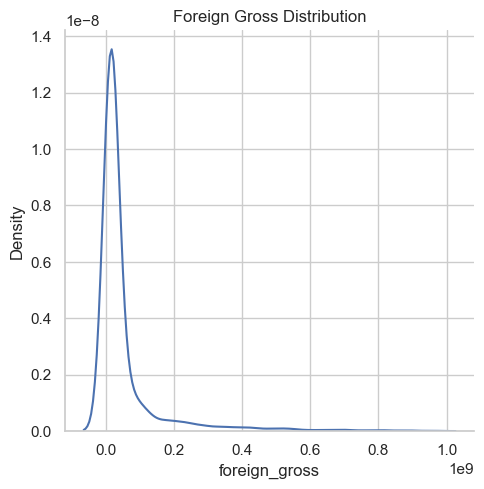

In [279]:
#Kernel Density Plot of foreign gross data
sns.displot(cleaned_movie_gross, x="foreign_gross", kind="kde")

# Title
plt.title('Foreign Gross Distribution')

# Show histplot
plt.show()

* The data in the foreign gross column is not normally distributed. From the displot, the data tends to skew towards the right, indicating presence of outliers.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


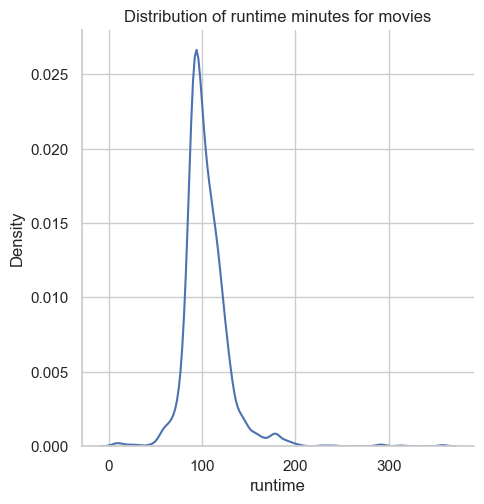

In [280]:
#Kernel Density Plot of runtime minutes
sns.displot(cleaned_movie_info, x="runtime", kind="kde")

# Title
plt.title('Distribution of runtime minutes for movies')

# Show histplot
plt.show()

* Most of the movies falls within 120–130 min of runtime.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


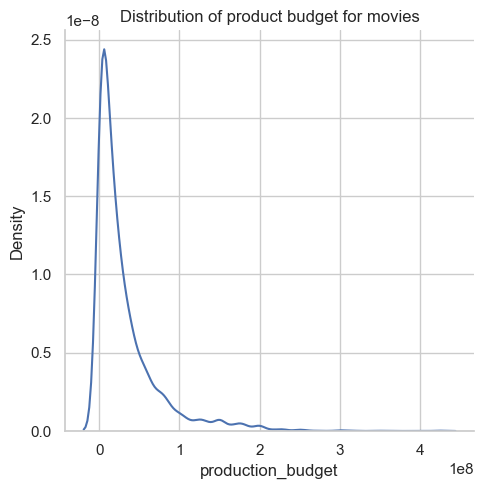

In [281]:
#Kernel Density Plot of production budget data
sns.displot(merged_df, x="production_budget", kind="kde")

# Title
plt.title('Distribution of product budget for movies')

# Show histplot
plt.show()

* The data in the production budget column is not normally distributed. From the displot, the data tends to skew towards the right, indicating presence of outliers.

#### Correlation Analysis

In [282]:
# Compute correlation for all numeric columns in cleaned_movie_gross
corr_cleaned_movie_gross = cleaned_movie_gross.corr(numeric_only=True)
corr_cleaned_movie_gross


,domestic_gross,foreign_gross,year
domestic_gross,1.000000,0.783519,0.018366
foreign_gross,0.783519,1.000000,0.054847
year,0.018366,0.054847,1.000000


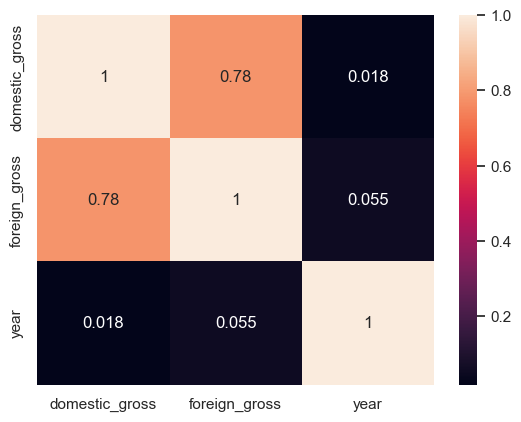

In [283]:
# Use hitmap to visualise correlation
sns.heatmap(cleaned_movie_gross[["domestic_gross",'foreign_gross',"year"]].corr(),annot=True);

##### Finding
* Correlation between the foreign gross and domestic gross had a strong positive. This implies that an increase in domestic gross could also be reflected with an increase in foreign gross.
* domestic gross and the year have a weak correlation, showing a weak relationship. Equally foreign gross and the year have a weak relationship.

#### Conclusion
For predictive modelling, the positive correlation between the domestic gross and foreign gross will be an important relationship to consider.

In [284]:
# Compute correlation for all numeric columns in merged_df data
corr_merged_df = merged_df.corr(numeric_only=True)
corr_merged_df

,id,runtime,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.045318,-0.033368,-0.007617,-0.026646
runtime,-0.045318,1.000000,0.004013,-0.000906,-0.003864
production_budget,-0.033368,0.004013,1.000000,0.672294,0.739237
domestic_gross,-0.007617,-0.000906,0.672294,1.000000,0.939333
worldwide_gross,-0.026646,-0.003864,0.739237,0.939333,1.000000


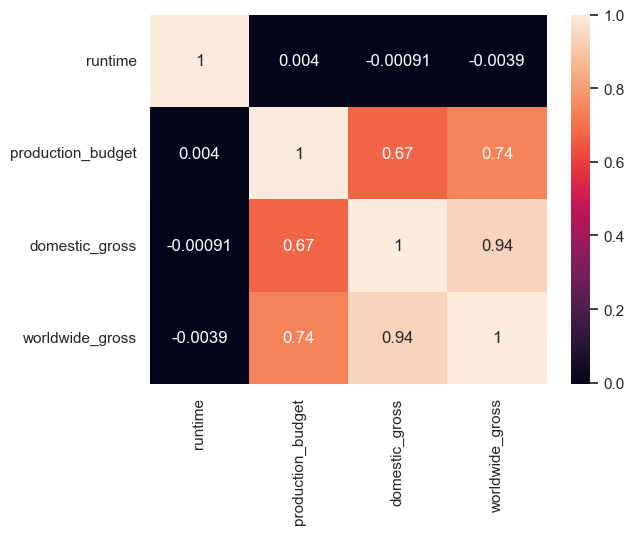

In [285]:
# Use hitmap to visualise correlation
sns.heatmap(merged_df[["runtime",'production_budget',"domestic_gross","worldwide_gross"]].corr(),annot=True);

#### Finding 
* Production budget has a positive correlation with both domestic gross and worldwide gross, with the later being stronger at 0.7392. This relationship implies that production budgets of movies have a relatively strong and positive relationship with both domestic and gross earning.
* Runtime has a weak relationship with production budget, domestic and worldwide gross. The correlation between runtime and production budget was 0.0040. Equally, the correlation between runtime with both domestic and worldwide gross was negative at -0.000906 and -0.003864, depicting a very weak relationship.

#### Conclusion
* The relationship between the production budget with both domestic gross and worldwide gross indicates that more production budget was likely to lead to increase in both domestic and worldwide gross revenues for the movies.

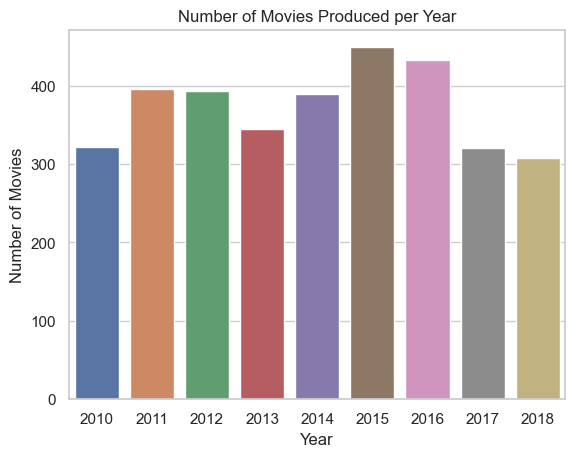

In [286]:
# Visualise cleaned_movie_gross dataframe
sns.countplot(data=cleaned_movie_gross, x="year")

# titles
plt.title('Number of Movies Produced per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

#### Statistical Testing for Linearity

To check for linearity in linear regression, the goal is to determine if the relationship between the independent variables (predictors) and the dependent variable (target) is linear.

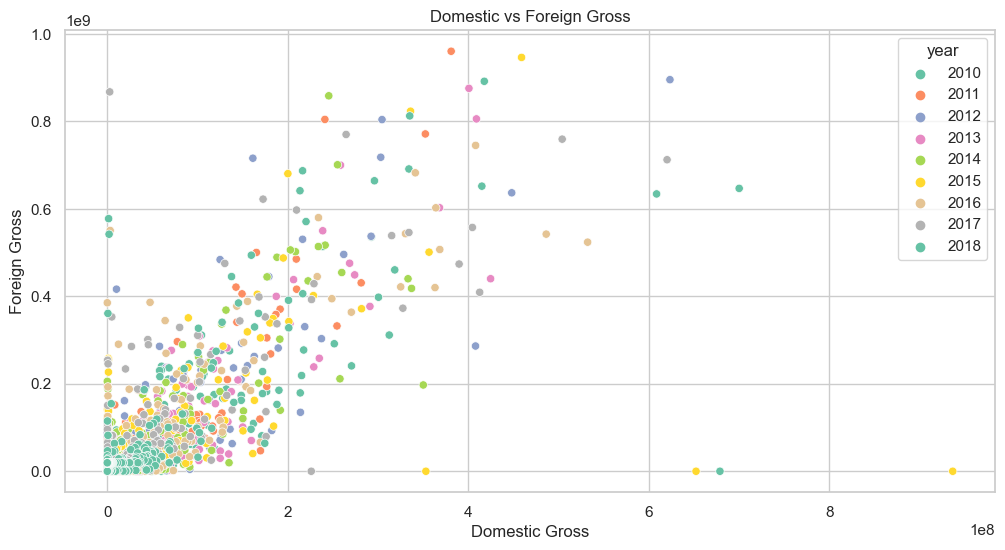

In [287]:
# Using Scatter plot to check linearity of domestic_gross and foreign_gross revenues
X = cleaned_movie_gross["domestic_gross"]
Y = cleaned_movie_gross["foreign_gross"]
plt.figure(figsize=(12,6))

sns.scatterplot(x=X,y=Y, hue=cleaned_movie_gross["year"],palette="Set2",alpha=1)

# Titles
plt.title('Domestic vs Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')

#Show visual
plt.show()

* There is a positive linear relationship between domestic gross and foreign gross. Most of the values lie between 0-2e8.

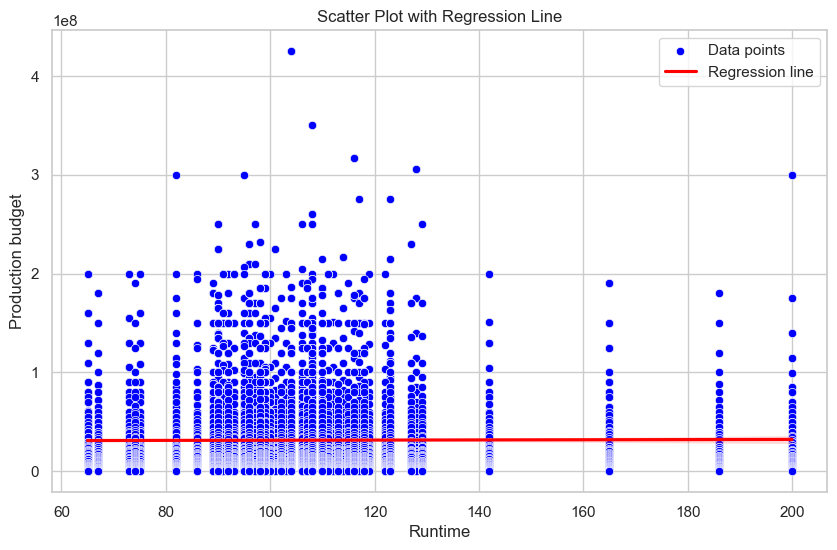

In [288]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="runtime", y="production_budget", label="Data points", color="blue")

# Overlay a regression line
sns.regplot(data=merged_df, x="runtime", y="production_budget", scatter=False, label="Regression line", color="red")

# Add labels and legend
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Runtime")
plt.ylabel("Production budget")
plt.legend()
plt.show()

* There is no linear relationship between runtime  and production budget.

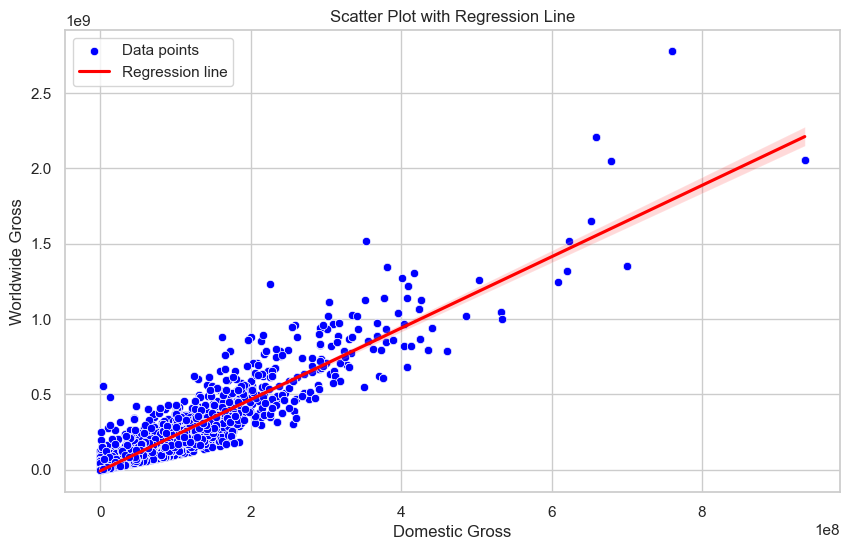

In [289]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="domestic_gross", y="worldwide_gross", label="Data points", color="blue")

# Overlay a regression line
sns.regplot(data=merged_df, x="domestic_gross", y="worldwide_gross", scatter=False, label="Regression line", color="red")

# Add labels and legend
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Domestic Gross")
plt.ylabel("Worldwide Gross")
plt.legend()

plt.show()

* There is a positive linear relationship between domestic gross and worldwide gross. Most of the values lie between 0-4e8.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


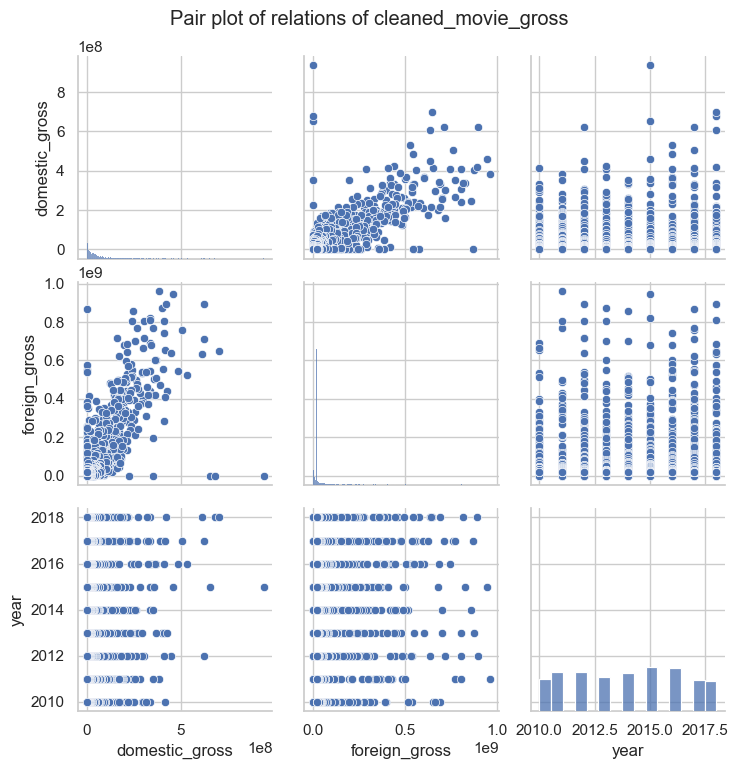

In [290]:
# Check relations in the cleaned_movie_gross
sns.pairplot(cleaned_movie_gross)

# Show
plt.suptitle("Pair plot of relations of cleaned_movie_gross", y=1.02);

* From the pairplot, the variables with a positive linear relationship were domestic gross and foreign gross.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


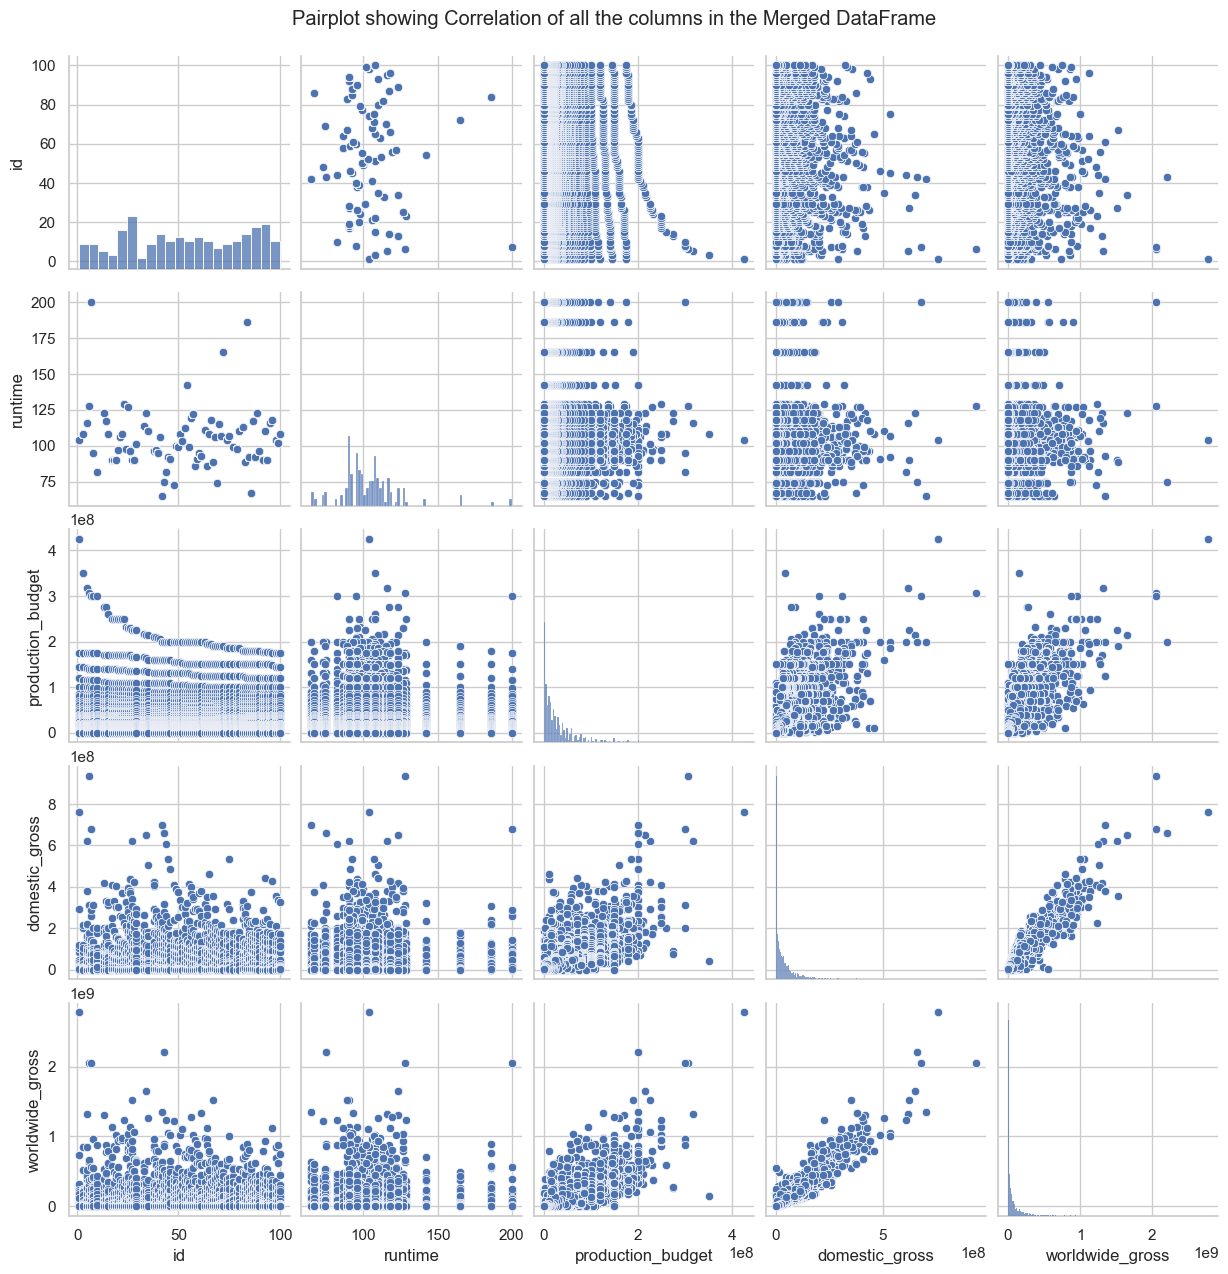

In [291]:
# Check relations in the merged_df (combination of movie_info and movie_budget)
sns.pairplot(merged_df)

plt.suptitle("Pairplot showing Correlation of all the columns in the Merged DataFrame",y=1.02);

#### Using rainbow test to test linear regression


#### Rainbow test for merged_df

In [292]:
# define the model 

def make_model(X,Y):
    model = sm.OLS(endog=Y ,exog=sm.add_constant(X))
    results = model.fit()
    return results

In [293]:
# The model
results = make_model(merged_df["runtime"],merged_df["production_budget"])

linear_rainbow(results)

(1.176113672306046, 4.134881259430884e-09)

Finding
* The test statistic value is 1.176. The p-value of 4.13e-09 is significantly smaller than the usual significance level of 0.05. As such, we could conclude that the the relationship between runtime and the production budget is not linear.

Conclusion
* Runtime as a function of movie production budget cannot be accurately modeled using a linear model.

In [294]:
# The model
results = make_model(merged_df["domestic_gross"],merged_df["worldwide_gross"])

linear_rainbow(results)

(1.0046016303476692, 0.4351843050918859)

Finding:
* The test statistic is 1.0046 while the p-value is 0.4352. A p-value of 0.4352 is much larger than significance level of 0.05. 
* The outcome of the rainbow test indicates that there is no significant evidence to suggest that the relationship between domestic gross and worldwide gross is nonlinear. 

Conclusion:
* We conclude that a linear model is suitable to model domestic gross and worldwide gross revenues for the movies.

#### Ordinary least squares (OLS) - merged_df

In [295]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 7.581e+04
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:59:36   Log-Likelihood:            -1.9571e+05
No. Observations:               10111   AIC:                         3.914e+05
Df Residuals:                   10109   BIC:                         3.914e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.328e+06   7.16e+05    -11.637      0.000   -9.73e+06   -6.93e+06
domestic_gross     2.3684      0.009    275.342      0.000       2.352       2.385
==============================================================================
Omnibus:                     7952.448   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           596457.368
Skew:                           3.214   Prob(JB):                         0.00
Kurtosis:                      40.074   Cond. No.                     9.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finding
* The R-squared of 0.882 shows us that 88.2% variance in the worldwide_gross can be attributed to the domestic_gross. This indicates that domestic_gross can be used to predict the worldwide_gross in a statistical model.

In [296]:
merged_df.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-05-29,Up,175000000.0,293004164.0,7.314634e+08
2,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2014-03-07,Mr. Peabody & Sherman,145000000.0,111506430.0,2.698064e+08
3,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2010-12-17,How Do You Know?,120000000.0,30212620.0,4.962818e+07
4,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2015-12-11,In the Heart of the Sea,100000000.0,25020758.0,8.969331e+07


#### Simple linear regression model

In [297]:
# Worldwide_gross predictor model
worldwide_gross_1=merged_df['worldwide_gross']
domestic_gross_1=merged_df['domestic_gross']
worldwide_gross_1=2.3684*domestic_gross_1+-8.328e+06


# predict worlwide_gross at domestic_gross of $3,516,297.93
domestic_gross_1m=3516297.93
worldwide_gross_1m=2.3684*domestic_gross_1m+-8.328e+06
worldwide_gross_1m



0.01741199940443039

Finding:
* Using the model, for the company to start making worldwide gross revenue, it will need to have made a domestic gross revenue of 3. 5 million dollars at R-square value of 88.2%.

#### Multilinear regression model

In [298]:
# Define the dependent and independent variables
y_1=merged_df['production_budget']
x_1=merged_df[['domestic_gross','worldwide_gross']]

# define the model 
def make_model(X,Y):
    model = sm.OLS(endog=y_1 ,exog=sm.add_constant(x_1))
    results = model.fit()
    return results

# Call the model
results = make_model(x_1, y_1)

# print results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      production_budget   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     6193.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:59:37   Log-Likelihood:            -1.8760e+05
No. Observations:               10111   AIC:                         3.752e+05
Df Residuals:                   10108   BIC:                         3.752e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.648e+07   3.23e+05     

Finding:
* R-squared of 0.551 indicates that the two independent variables  of domestic_gross and worldwide_gross provide for 55.1% of the variability in production_budget. This shows that the remaining 44.9% of variability is contributed by other elements not in the model.

#### Multilinear regression model

In [299]:
# Worldwide_gross predictor model
production_budget_1=merged_df['production_budget']
domestic_gross_1=merged_df['domestic_gross']
worldwide_gross_1=merged_df['worldwide_gross']

# multilinear model
production_budget_1=-0.1087*domestic_gross_1+0.2102*worldwide_gross_1+1.648e+07

# predict production budget at domestic_gross of $1 million and worldwide gross of $ 1 million
domestic_gross_1=1000000
worldwide_gross_1=1000000
production_budget_1=-0.1087*domestic_gross_1+0.2102*worldwide_gross_1+1.648e+07
production_budget_1



16581500.0

Finding
* To achieve domestic gross and worldwide gross revenues of 1 million dollars, the model indicates that the studio needs a production budget of of about 16.6 million dollars.

#### Rainbow test for cleaned movie gross

In [300]:
# The model
X = cleaned_movie_gross["domestic_gross"]
Y = cleaned_movie_gross["foreign_gross"]

results_2 = make_model(cleaned_movie_gross["foreign_gross"],cleaned_movie_gross["domestic_gross"])

linear_rainbow(results_2)

(1.2767509430944228, 2.1016718582315102e-18)

Finding:
* The test statistic is 1.2768 while the p-value is 2.107 and is larger than significance level of 0.05. 
* The outcome of the rainbow test indicates that there is no significant evidence to suggest that the relationship between domestic gross and worldwide gross was nonlinear. 

Conclusion:
* We conclude that a linear model is suitable to model foreign gross against domestic gross revenues for the movies as it has a strong fit.

#### Ordinary least squares (OLS) - cleaned_movie_gross

In [301]:
cleaned_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [302]:
# Define the dependent and independent variables
y_1=cleaned_movie_gross['domestic_gross']
x_1=cleaned_movie_gross[['foreign_gross']]

# define the model 
def make_model(X,Y):
    model = sm.OLS(endog=y_1 ,exog=sm.add_constant(x_1))
    results = model.fit()
    return results

# Call the model
results = make_model(x_1, y_1)

# print results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     5333.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:59:37   Log-Likelihood:                -63641.
No. Observations:                3356   AIC:                         1.273e+05
Df Residuals:                    3354   BIC:                         1.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.501e+06   7.98e+05      4.388

Finding:
* The R-squared of 0.614 indicates that domestic_gross variable accounts for 61.4% of the variance in foreign_gross. The observation shows that foreign_gross may affected by other factors not included in the model.

In [303]:
# Alternative to get coefficients for modelling
results_2.params

const              1.647772e+07
domestic_gross    -1.086788e-01
worldwide_gross    2.101542e-01
dtype: float64

#### Simple linear regression

In [304]:
# domestic gross predictor model
foreign_gross_2=cleaned_movie_gross['foreign_gross']
domestic_gross_2=cleaned_movie_gross['domestic_gross']
domestic_gross_2=0.4757*foreign_gross_2+3.501e+06


# predict domestic_gross at foreign gross revenue of $ 1 million
foreign_gross_2=1000000
domestic_gross_2=0.4757*foreign_gross_2+3.501e+06
domestic_gross_2


3976700.0

Finding:
* To achieve a domestic gross revenue of 3.98 million dollars, the model predicts that the studion will need to make an equivalent of 1 million dollars in foreign gross revenue, at r-squared value of 0.614.

#### Univariate analysis

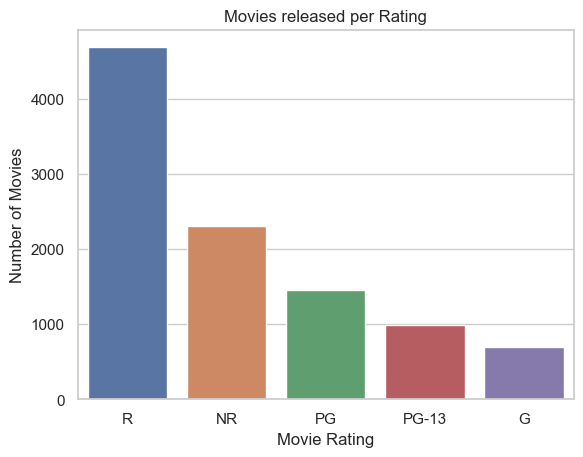

In [305]:
# Check the rating count on the movie_info data
merged_df['rating'] = merged_df['rating'].astype(str)  

# Plot
sns.countplot(x='rating', data=merged_df)
plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies')
plt.title("Movies released per Rating")
plt.show()

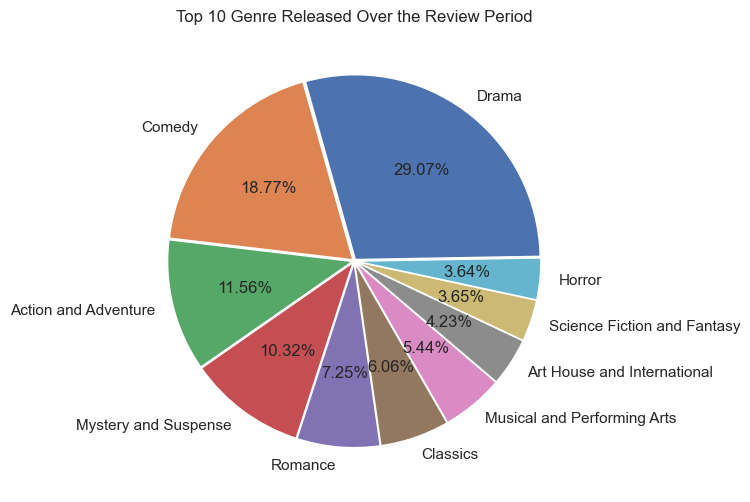

In [306]:
# Analysis of the highest between those with and those without genre

genre_count = merged_df['genre'].value_counts()[:10] # Top 10 genre to ensure better visualisation

# Explode values by o.01
explode = [0.01] * len(genre_count)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(genre_count, labels= genre_count.index, autopct='%0.2f%%', startangle= 1, explode=explode)
plt.title ('Top 10 Genre Released Over the Review Period')

# Show piechart
plt.show()

#### Bivariate Avalysis

0        3.536853e+09
1        1.024468e+09
2        3.813129e+08
3        7.984080e+07
4        1.147141e+08
             ...     
10106    5.526140e+05
10107    3.439240e+05
10108    2.697200e+04
10109    0.000000e+00
10110    6.200000e+06
Name: total_revenue, Length: 10111, dtype: float64
0        3.111853e+09
1        8.494675e+08
2        2.363129e+08
3       -4.015920e+07
4        1.471407e+07
             ...     
10106   -4.473860e+05
10107   -3.060760e+05
10108   -4.230280e+05
10109   -2.500000e+05
10110    6.113000e+06
Name: profit, Length: 10111, dtype: float64


c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


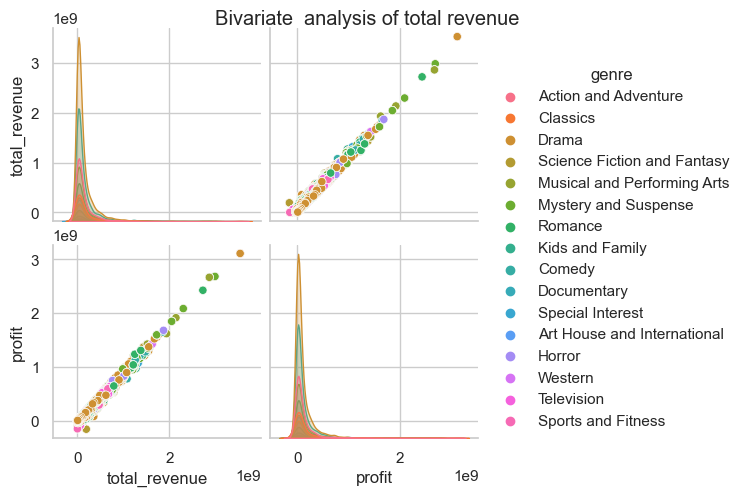

In [307]:
# Calculate the total revenue for each movie 
merged_df['total_revenue'] = merged_df['domestic_gross'] + merged_df['worldwide_gross']

print(merged_df['total_revenue'])

# Calculate profit 
merged_df['profit'] = merged_df['total_revenue'] - merged_df['production_budget'] 

print(merged_df['profit'])

sns.pairplot(merged_df[['total_revenue', 'profit', 'genre']], hue='genre')

#title
plt.suptitle('Bivariate  analysis of total revenue')

# Show pairplot
plt.show()

Findings
* Strong Positive Correlation: There is a clear, strong positive linear relationship between total_revenue and profit, shown by the diagonal trend in the scatter plot. This indicates that as revenue increases, profit generally increases proportionally.

* Skewed Distribution: Both total_revenue and profit are heavily right-skewed, with most movies having lower values for both metrics. A small number of movies achieve very high total revenue and profit, likely indicating highly successful movies films with substantial financial success. The distribution plot shows that most movies do not reach high total revenue or profit, indicating that substantial financial success is uncommon.

* Genre-Based Trends: Certain genres, such as Drama (orange) and Science Fiction and Fantasy (green), are more likely to achieve higher total revenue and profit, as these points appear more frequently among the higher values. Other genres, like Documentary and Special Interest, are mostly clustered near the lower end of total revenue and profit, suggesting limited financial performance for these genres. Action and Adventure and Science Fiction and Fantasy appear to achieve high values, showing these genres might have greater potential for profitability and revenue.

#### Multivariate Analysis

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


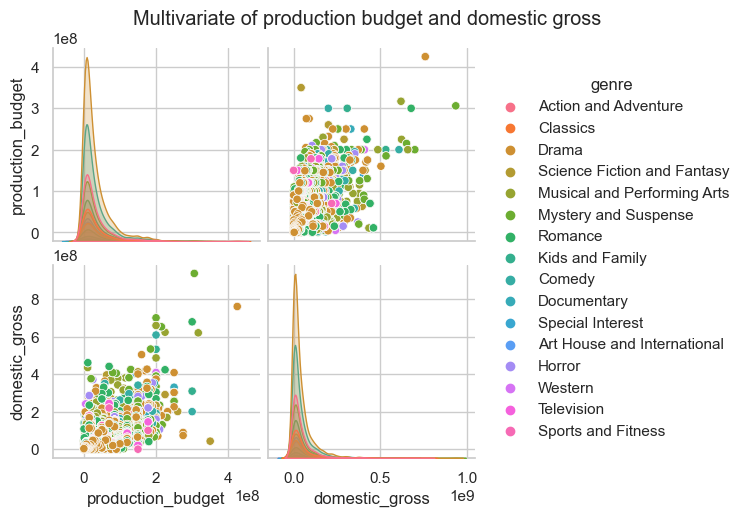

In [308]:
# Multivariate analysis of production budget, domestic gross and genre
sns.pairplot(merged_df[['production_budget', 'domestic_gross', 'genre']], hue='genre')


#Add the title
plt.suptitle('Multivariate of production budget and domestic gross', y=1.02)

#show the plot
plt.show()

Findings
* Budget and Revenue Correlation: There is a general positive relationship between production budget and domestic gross, though not all high-budget films guarantee high domestic revenue.
* Genre Influence: Genres such as Action and Adventure and Science Fiction and Fantasy are associated with both high production budgets and potentially high domestic grosses, possibly due to broader commercial appeal. In contrast, genres like Documentary and Special Interest tend to have smaller budgets and lower domestic revenue, likely reflecting niche markets.
* Skewed Distribution: Most movies have relatively low production budgets and domestic grosses, with only a few movies achieving very high values in either category.

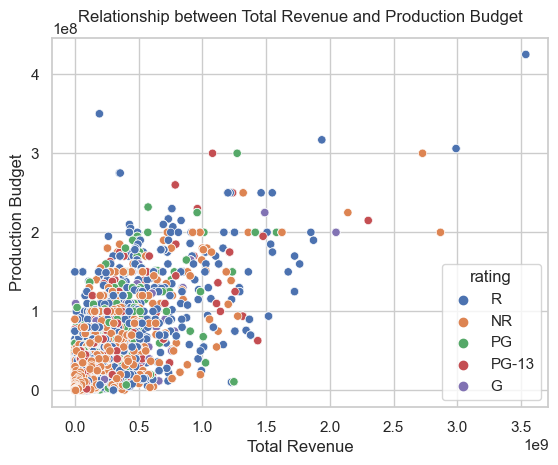

In [309]:

# Plot the relationship between total_revenue and production_budget
sns.scatterplot(x='total_revenue', y='production_budget', hue='rating', data=merged_df)

# Display the plot
plt.title('Relationship between Total Revenue and Production Budget', y=1.02)
plt.xlabel('Total Revenue')
plt.ylabel('Production Budget')
plt.show()

Finding
* The higher production budgets generally correlate with higher total revenue, most movies fall within a lower budget and revenue range. 
* Outliers with high budgets and revenue are exceptional cases, likely representing blockbuster films. 
* Ratings don’t show a strong correlation with production budgets or revenue in this plot.

### Business Objective Questions

OBJECTIVE QUESTION 1
#### 1. What are the trends in movie release dates and what impact do they have on revenue?

In [310]:
#Extract month from the release date column
merged_df["month"] = merged_df["release_date"].dt.month

#Extract year from the release date column
merged_df["year"] = merged_df["release_date"].dt.year


# Group by month and calculate the domestic and worldwide gross
monthly_gross_tot = merged_df.groupby('month').agg({'domestic_gross': ['sum', 'count'],
'worldwide_gross': 'sum'}).round(2)

# Renaming column names
monthly_gross_tot.columns = ['tot_domestic', 'movie_count', 'tot_worldwide']

monthly_gross_tot = monthly_gross_tot.reset_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

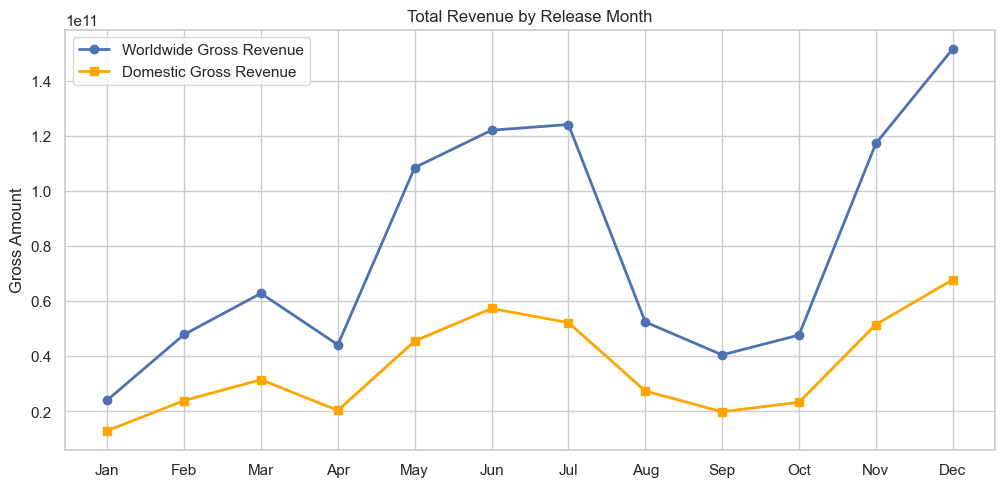

In [311]:
# Create visualization
plt.figure(figsize=(12, 12))

#Plot of Worldwide Gross by Month
x = months
y1 = monthly_gross_tot['tot_worldwide']
y2 = monthly_gross_tot['tot_domestic']

plt.subplot(2, 1, 1)
plt.plot(x, y1, marker='o', linewidth=2, label='Worldwide Gross Revenue')
plt.plot(x, y2, marker='s', linewidth=2, label='Domestic Gross Revenue', color='orange')
plt.title('Total Revenue by Release Month')
plt.ylabel('Gross Amount')
plt.grid(True)
plt.legend()
plt.show()

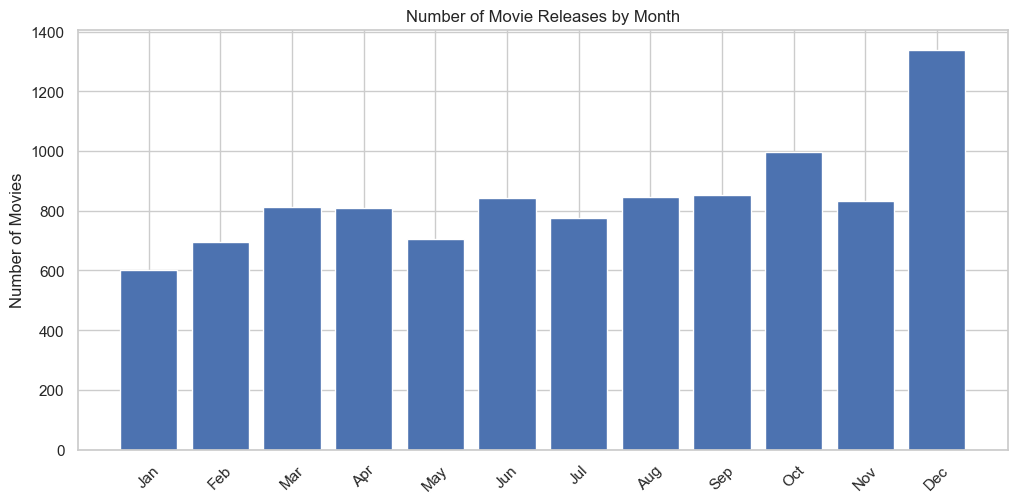

In [312]:
#Plot of Number of Movies Released by Month
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)
plt.bar(x, monthly_gross_tot['movie_count'])
plt.title('Number of Movie Releases by Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [313]:
#Print monthly statistics
print("Monthly Revenue Analysis:")

print(monthly_gross_tot)

Monthly Revenue Analysis:
    month  tot_domestic  movie_count  tot_worldwide
0       1  1.298520e+10          600   2.411203e+10
1       2  2.394688e+10          695   4.793976e+10
2       3  3.152107e+10          814   6.287655e+10
3       4  2.034546e+10          809   4.418536e+10
4       5  4.556020e+10          706   1.085506e+11
5       6  5.737845e+10          843   1.221148e+11
6       7  5.225216e+10          777   1.241838e+11
7       8  2.739861e+10          845   5.246982e+10
8       9  1.987983e+10          854   4.052443e+10
9      10  2.333111e+10          996   4.772882e+10
10     11  5.155100e+10          832   1.172945e+11
11     12  6.782864e+10         1340   1.516469e+11


In [314]:
#Calculate yearly trends
yearly_gross = merged_df.groupby('year').agg({
    'worldwide_gross': ['mean', 'count']
}).round(2)

#Rename the columns
yearly_gross.columns = ['tot_worldwide', 'movie_count']

yearly_gross = yearly_gross.reset_index()

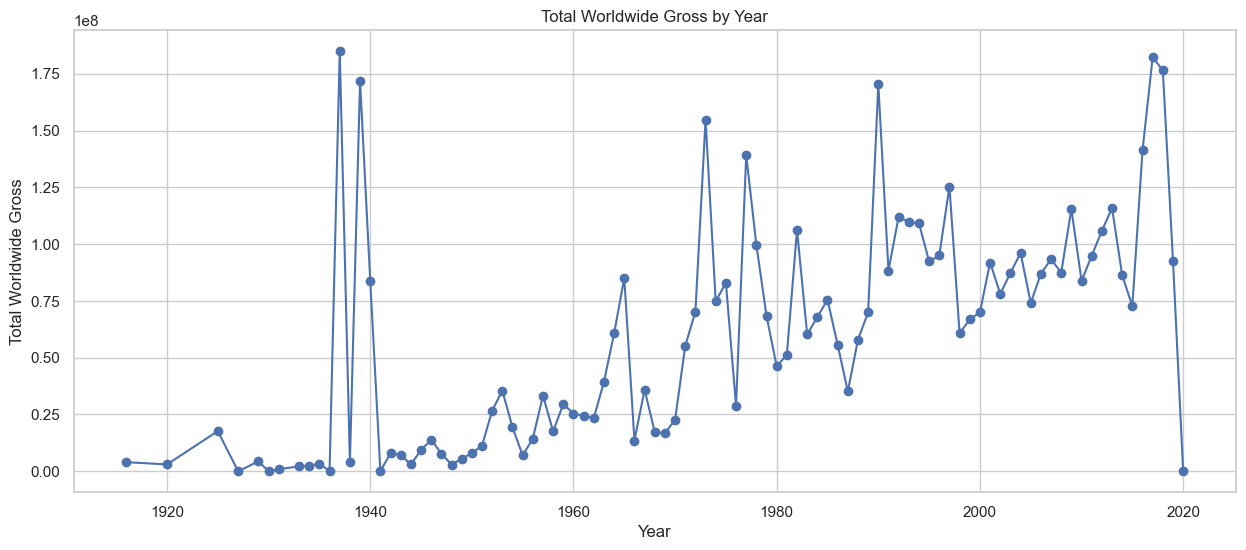

In [315]:
# Plot yearly trend
plt.figure(figsize=(15, 6))
plt.plot(yearly_gross['year'], yearly_gross['tot_worldwide'], marker='o')
plt.title('Total Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross')
plt.grid(True)
plt.show()

In [316]:
#correlation between release month and worldwide gross
corr = merged_df["month"].corr(merged_df["worldwide_gross"])

print(f"There is a correlation of {corr:.4f} between the movie release month and the worldwide gross")

There is a correlation of 0.0544 between the movie release month and the worldwide gross


Findings
* The months of June, July and December consistently show the highest total worldwide gross

* December is the most profitable month with a total worldwide gross 

* December has the highest number of movies released 

* November and December also shows strong performance in terms of revenue

* January and September show the lowest total revenues

The findings suggests that profitable films are released during the months June, July and December. This may be due to the activities during that period.


Recommendations
Based on the findings regarding movie release patterns and their impact on worldwide gross revenues, below are recommendations to our company:

* We recomending to the company to prioritize releasing more movies during the months of June, July and December. December is the most profitable month and therefore aiming at this timeframe could maximize on box office revenue.

* We recommend the company to utilize lower budget or experimental films in months like January and September which have lower revenue to maintain a consistent presence.

* We also recommend to the company to increase marketing efforts leading up to and during January and September to maximize opening-weekend success and overall revenue.

* Release High-Potential Films in November-December as it shows strong performance in revenue. We would recommend to the company to release family-oriented films and holiday-themed movies to take advantage of the holiday crowds.



OBJECTIVE QUESTION 2
#### 2.  Is there a relationship between production budget and profitability?


#### State the Null and Alternative Hypothesis
* Null Hypothesis: There is no difference in ROI between movies that have a high production budget and those that have a low production budget
* Alternative Hypothesis: There is a significant difference in ROI between movies that have a high production budget and those that have a low production budget

In [317]:
# Load the data
df = pd.read_csv('merged_df_cleaned')

# Display the first 5 rows of the dataframe to understand its structure
df.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-05-29,Up,175000000.0,293004164.0,7.314634e+08
2,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2014-03-07,Mr. Peabody & Sherman,145000000.0,111506430.0,2.698064e+08
3,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2010-12-17,How Do You Know?,120000000.0,30212620.0,4.962818e+07
4,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2015-12-11,In the Heart of the Sea,100000000.0,25020758.0,8.969331e+07


In [318]:
# Create new columns profitability and ROI and calculate
df['profitability'] = df['worldwide_gross'] - df['production_budget']

df['ROI'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']

corr_profit: 0.603508342791181
corr_roi: -0.04426861908236428


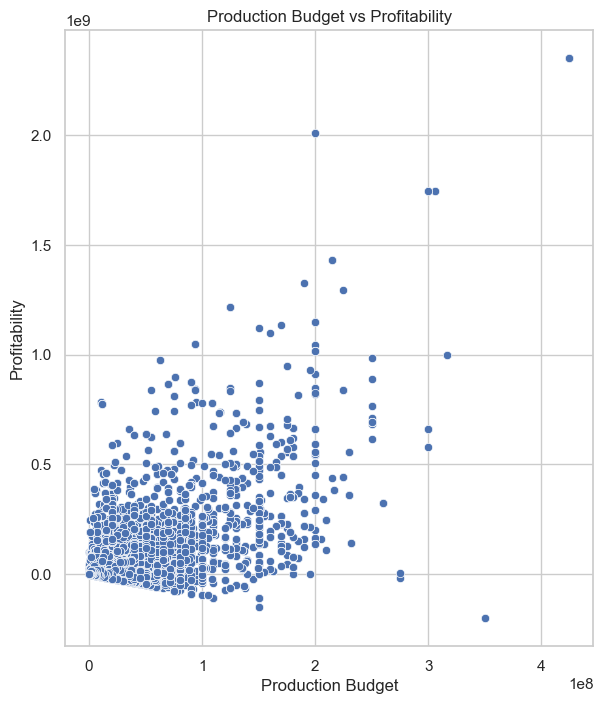

In [319]:
# Calculate correlations
corr_profit = df['production_budget'].corr(df['profitability'])

corr_roi =    df['production_budget'].corr(df['ROI'])

print(f"corr_profit: {corr_profit}")
print(f"corr_roi: {corr_roi}")

# Scatter plot for Production Budget vs Profitability
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='production_budget', y='profitability')
plt.title('Production Budget vs Profitability')
plt.xlabel('Production Budget')
plt.ylabel('Profitability')
plt.show()

OBJECTIVE QUESTION 3
#### 3. Is there a significant difference in ROI between movies that have a high production budget and those that have a low production budget?

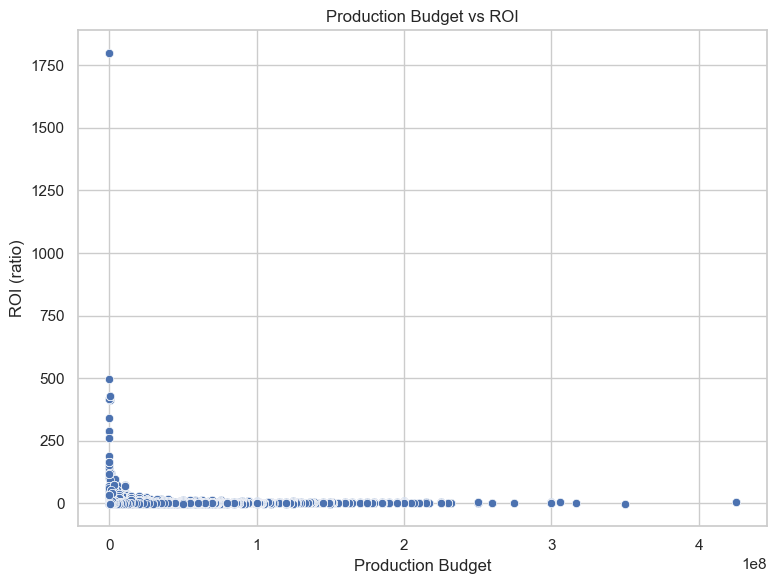

In [320]:
# Scatter plot for Production Budget vs ROI
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='production_budget', y='ROI')
plt.title('Production Budget vs ROI')
plt.xlabel('Production Budget')
plt.ylabel('ROI (ratio)')
plt.tight_layout()
plt.show()

In [321]:
# Print correlation results
print(f"Correlation Analysis:")
print("Production Budget vs Profitability:")
print(f"Correlation coefficient: {corr_profit:.4f}")

Correlation Analysis:
Production Budget vs Profitability:
Correlation coefficient: 0.6035


In [322]:
print("\
Production Budget vs ROI:")
print(f"Correlation coefficient: {corr_roi:.4f}")

Production Budget vs ROI:
Correlation coefficient: -0.0443


In [323]:
# Compare high vs low budget movies
median_budget = df['production_budget'].median()
high_budget = df[df['production_budget'] > median_budget]['ROI']
low_budget = df[df['production_budget'] <= median_budget]['ROI']

t_stat, p_val = ttest_ind(high_budget, low_budget)

print(f"T-test Results (High vs Low Budget Movies ROI):")

print(f"T-statistic: {t_stat:.4f}")

print(f"P-value: {p_val:.4f}")

T-test Results (High vs Low Budget Movies ROI):
T-statistic: -6.5431
P-value: 0.0000


In [324]:
# Calculate summary statistics
print(f"Summary Statistics:")
print(f"High Budget Movies (Above Median):")
print(f"Average ROI: {high_budget.mean():.4f}")
print(f"Median ROI: {high_budget.median():.4f}")

Summary Statistics:
High Budget Movies (Above Median):
Average ROI: 1.7413
Median ROI: 0.9293


In [325]:
print(f"Low Budget Movies (Below Median):")
print(f"Average ROI: {low_budget.mean():.4f}")
print(f"Median ROI: {low_budget.median():.4f}")

Low Budget Movies (Below Median):
Average ROI: 5.7386
Median ROI: 0.2663


Findings

* The analysis shows a moderate positive correlation between production budget and profitability, but a very weak negative correlation between production budget and ROI. Assuming a confidence level of 95%, our significance level is therefore 0.05. The p-value obtained from the t-test is far much less than the alpha value of 0.05 hence we reject the null hypothesis. This therefore indicates that there is a significant difference in ROI between high and low budget movies, with low budget movies having a higher average ROI.

Recommendations to the company based on the above findings

1. Low-Budget Film Investment
The notable difference in ROI between high-budget and low-budget movies, where lower-budget films show a higher average ROI, indicates that investing in such films can be more profitable. Therefore, I recommend the company diversify its film portfolio by including more investments in lower-budget projects to enhance overall profitability and mitigate financial risk. Allocating a portion of funds to smaller, strategically selected productions that offer high returns relative to their cost will support this goal.

2. Optimized Budget Resource Allocation
There is a weak negative correlation between production budget and ROI, suggesting that increasing the budget does not necessarily lead to higher returns. Higher spending on production may not result in proportional profitability gains. Therefore, I recommend the company implement stricter budget controls and optimize resource allocation to focus spending on elements that enhance the film's appeal without unnecessarily inflating costs.

3. Marketing Focus
Low-budget films, though smaller in scale, can achieve high ROIs when marketed effectively to their target audience. The notable ROI of low-budget movies underscores the opportunity to maximize profitability through strategic marketing. I recommend the company develop tailored marketing campaigns for lower-budget films, utilizing cost-effective promotional strategies to enhance revenue potential.


OBJECTIVE QUESTION 4
#### 4. Is the average runtime of highly rated movies (e.g. ratings above 8) significantly different from that of lower-rated movies (e.g., ratings below 5)?

#### State the Null and Alternative Hypothesis
* Null Hypothesis: There is no difference between the ratings of highly rated movies and lower rated movies i.e ratings above 8
* Alternative Hypothesis: There is a significant difference between the ratings of highly rated movies and lower rated movies i.e ratings below 5.

In [326]:
#Check the genres column
print(f"Sample of genres:")
print(movie_df['genres'].head(10))

Sample of genres:
0             Action,Crime,Drama
1                Biography,Drama
2                          Drama
4           Comedy,Drama,Fantasy
6     Adventure,Animation,Comedy
7                          Drama
8                        History
9                    Documentary
10                         Drama
11                   Documentary
Name: genres, dtype: object


In [327]:

#Create a copy of the dataframe
expanded_df = movie_df.copy()

# Convert the genres string to a list
expanded_df['genre'] = expanded_df['genres'].str.split(',')

#Create a row for each genre
expanded_df = expanded_df.explode('genre')

# Show the results
print(f"Rows: {expanded_df.shape[0]}, Columns: {expanded_df.shape[1]}")

Rows: 118437, Columns: 9


In [328]:
#print first five rows of new df
expanded_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama


In [329]:

#print the columns of new df
expanded_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'genre'],
      dtype='object')

In [330]:
# Drop the original 'genres' column since we now have individual genres
expanded_df = expanded_df.drop('genres', axis=1)

#Check on the first five rows
expanded_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Drama


In [331]:
# Group by movie_id to calculate average runtime and rating for each movie
movie_stats = expanded_df.groupby('movie_id').agg({
    'runtime_minutes': 'mean',
    'averagerating': 'mean'}).reset_index()

# Create high and low rated movie groups
high_rated = movie_stats[movie_stats['averagerating'] >= 8]

low_rated = movie_stats[movie_stats['averagerating'] < 5]

In [332]:

# Calculate basic statistics
high_rated_stats = high_rated['runtime_minutes'].describe()

low_rated_stats = low_rated['runtime_minutes'].describe()

print("High-Rated Movies (Rating >= 8) Runtime Statistics:")
print(high_rated_stats)

High-Rated Movies (Rating >= 8) Runtime Statistics:
count    7988.000000
mean       88.620431
std        39.037479
min         4.000000
25%        70.000000
50%        86.000000
75%       100.000000
max      1440.000000
Name: runtime_minutes, dtype: float64


High rated movies: The standard deviation of 39.04 is significant. The minimum movie runtime was 4 minutes long with the maximum at 1440. The 1440 minutes suggests existence of outliers in the dataset. The average runtime was 88.62 minutes.

In [333]:
print("\
Low-Rated Movies (Rating < 5) Runtime Statistics:")
print(low_rated_stats)

Low-Rated Movies (Rating < 5) Runtime Statistics:
count    10991.000000
mean        92.710490
std         19.802852
min          4.000000
25%         82.000000
50%         90.000000
75%         99.000000
max        480.000000
Name: runtime_minutes, dtype: float64


Low rated movies: The standard deviation of 19.04 is significant, implying big variations in the run time. The minimum movie runtime was 4 minutes long with the maximum at 480. The 480 minutes suggests existence of outliers in the dataset. The average runtime was 92.71 minutes.

In [334]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(high_rated['runtime_minutes'], low_rated['runtime_minutes'])

print("\
t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-test Results:
t-statistic: -9.4395
p-value: 0.0000


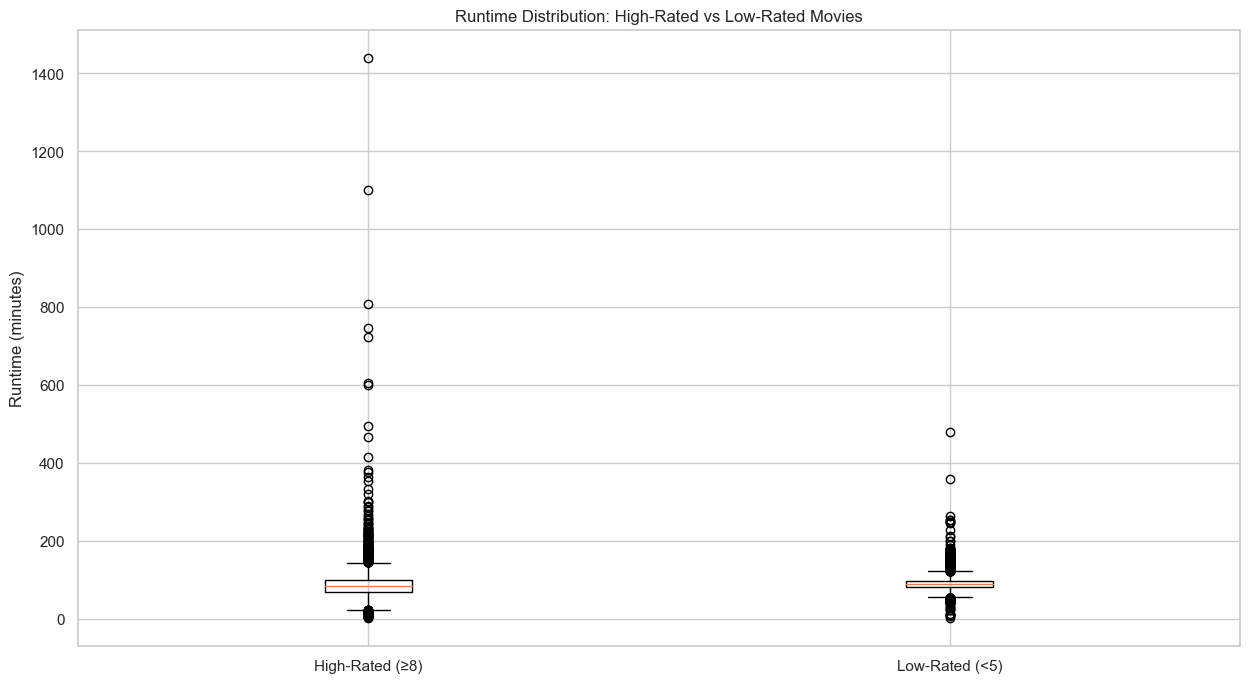

In [335]:

# Creating a box plot
plt.figure(figsize=(15, 8))
data = [high_rated['runtime_minutes'], low_rated['runtime_minutes']]
labels = ['High-Rated (≥8)', 'Low-Rated (<5)']
plt.boxplot(data, labels=labels)
plt.title('Runtime Distribution: High-Rated vs Low-Rated Movies')
plt.ylabel('Runtime (minutes)')
plt.show()

In [336]:

#Runtime distribution by rating bins
movie_stats['rating_bin'] = pd.qcut(movie_stats['averagerating'], q=5, labels=['1-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
runtime_by_rating = movie_stats.groupby('rating_bin')['runtime_minutes'].agg(['mean', 'median', 'std', 'count']).round(2)

print(f"Runtime Analysis by Rating Quintiles:")

print(runtime_by_rating)

# Calculate percentage of movies over 2 hours for each group
high_rated_long = (high_rated['runtime_minutes'] > 120).mean() * 100

low_rated_long = (low_rated['runtime_minutes'] > 120).mean() * 100

Runtime Analysis by Rating Quintiles:
             mean  median     std  count
rating_bin                              
1-20%       96.67    90.0  434.62  13975
20-40%      95.73    93.0   20.32  12668
40-60%      96.69    94.0  124.03  13761
60-80%      94.21    92.0   24.80  12326
80-100%     90.10    88.0   35.66  12990


In [337]:

#print pct of movies over 2 hours
print(f"\
Percentage of movies over 2 hours:")
print(f"High-rated movies: {high_rated_long:.1f}%")

print(f"Low-rated movies: {low_rated_long:.1f}%")

Percentage of movies over 2 hours:
High-rated movies: 9.9%
Low-rated movies: 7.9%



Findings

Percentage of movies over 2 hours:

* High-rated movies: 9.9%

* Low-rated movies: 7.9%

The analysis shows that high-rated movies tend to be slightly shorter on average, but they're actually more likely to be over 2 hours long (9.9% vs 7.9%). This suggests that while shorter runtimes are generally associated with higher ratings, there's a subset of longer, high-quality films that audiences appreciate.

From the value of p-value gotten from our analysis, assuming a significance level of 0.05, then we reject the null hypothesis. This therefore suggests that there is a significant difference in the average runtime of highly rated movies and low rated movies

Recomendations

1. We recommend to the company to consider producing shorter films for wider audience appeal while also investing in select, high-quality longer films that can captivate audiences and drive engagement.

2. Allocate more resources to produce a mix of shorter, high-rating-friendly films and select longer, high-quality projects that will meet the expectations of more targeted audiences.

OBJECTIVE QUESTION 5
#### 5. What is the average Domestic Revenue per Genre?

1. Domestic Gross Revenue per Genre

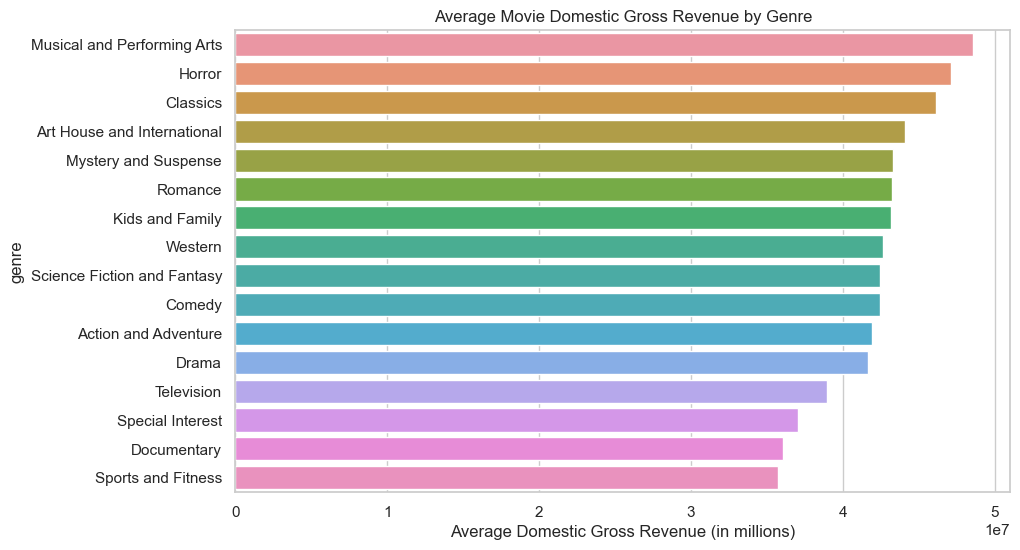

In [338]:
# Review  average domestic gross revenue by genre
genre_revenue = merged_df.groupby('genre')['domestic_gross'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index)

#title
plt.title('Average Movie Domestic Gross Revenue by Genre')
plt.xlabel('Average Domestic Gross Revenue (in millions)')
plt.show()

OBJECTIVE QUESTION 6
2. What is the Average Foreign Revenue per Genre?

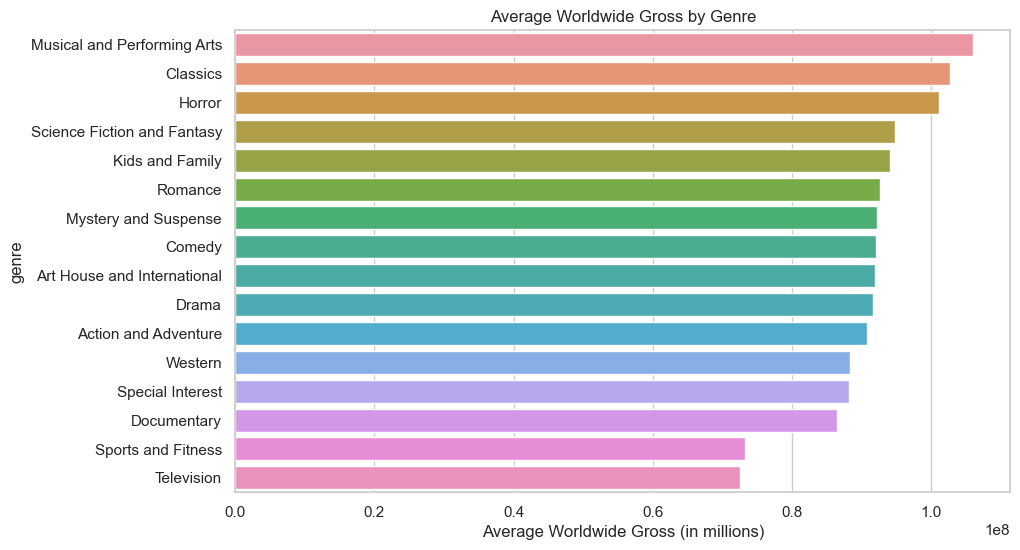

In [339]:
# Ploting barplot
genre_revenue = merged_df.groupby('genre')['worldwide_gross'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index)

# Titles
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Average Worldwide Gross (in millions)')

# Show the barplot
plt.show()

OBJECTIVE QUESTION 7
#### 7. Is there any correlation between Movie Ratings and Domestic Gross?

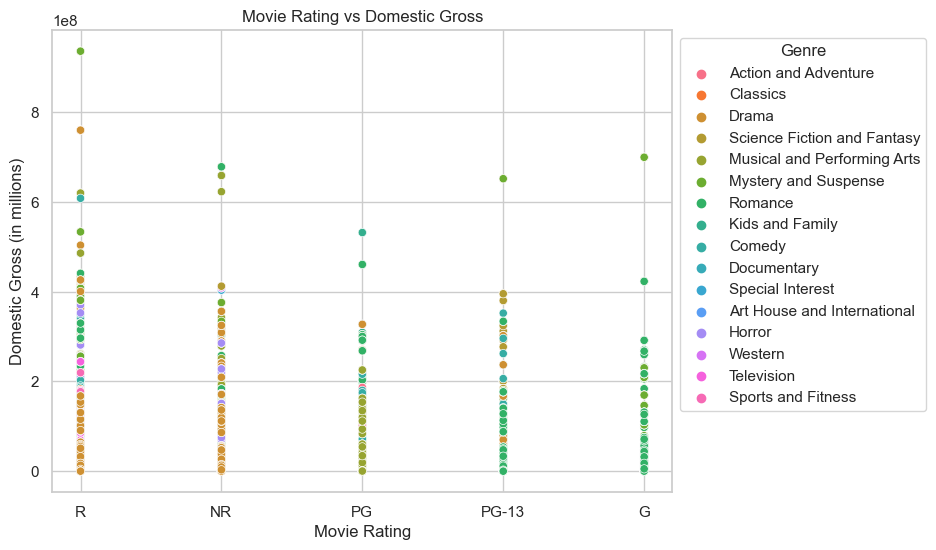

In [340]:
# Ratings on movie Success
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='rating', y='domestic_gross', hue='genre')
plt.title('Movie Rating vs Domestic Gross')
plt.xlabel('Movie Rating')
plt.ylabel('Domestic Gross (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

OBJECTIVE QUESTION 8
#### 8. Is there a correlation between movie ratings and worldwide Gross?

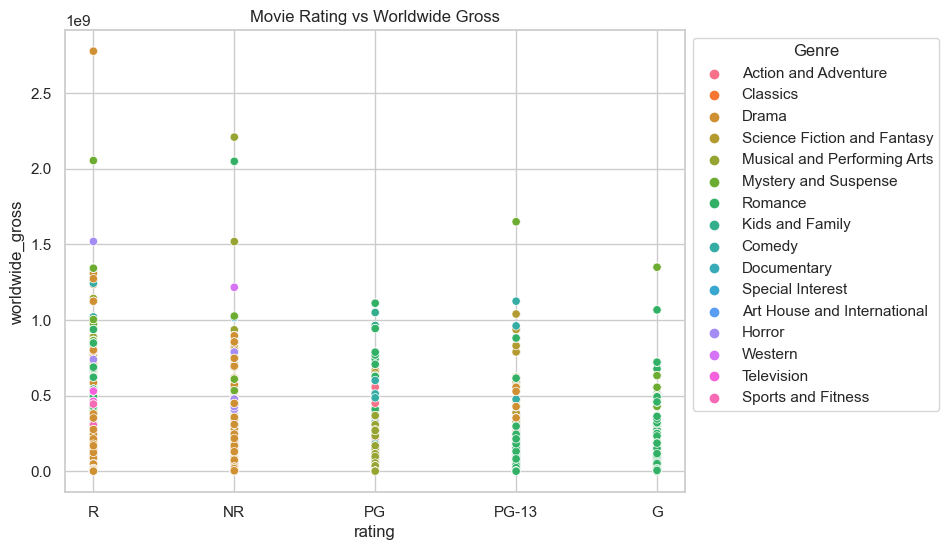

In [341]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='rating', y='worldwide_gross', hue='genre')
plt.title('Movie Rating vs Worldwide Gross')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))

Genre perfomance

* Musical and Performing Arts consistently outperforms other genres in both domestic and worldwide gross revenue.

* Horror and Science Fiction and Fantasy also show strong performance in both domestic and worldwide markets.

* Classics and Documentary have a higher average domestic gross compared to their worldwide performance.

#### Conclusion 

In conclusion, based on our findings, investing in a movie studio can be a viable and profitable idea if approached strategically. Prioritizing high-revenue release months, such as June, July, and December, and focusing on family and holiday-themed films during peak times can maximize box office returns.
Leveraging lower-budget or experimental films in quieter months, supported by targeted marketing, maintains year-round visibility and diversifies revenue streams. The higher average ROI of lower-budget films indicates that strategic investments in smaller productions can enhance profitability while minimizing financial risk. Implementing budget controls and focusing on impactful resource allocation will further support sustainable growth. By adopting these strategies, a movie studio can effectively balance risk and reward, making it a potentially lucrative investment opportunity.